<a href="https://colab.research.google.com/github/marinabrts/marinabrts.github.io/blob/main/GEIxSMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests, pandas as pd

In [ ]:
tables = pd.read_html('https://thegedi.org/global-entrepreneurship-and-development-index/')

In [ ]:
tables[0]

,Rank,Country,GDP World Bank intenational$ 2011,GEI
0,1,United States,52676,83.6
1,2,Switzerland,54933,80.4
2,3,Canada,42104,79.2
3,4,United Kingdom,37451,77.8
4,5,Australia,42149,75.5
...,...,...,...,...
132,133,Malawi,753,12.2
133,134,Bangladesh,3179,11.8
134,135,Burundi,735,11.8
135,136,Mauritania,3272,10.9


In [ ]:
df=tables[0]

In [ ]:
df.head(5)

,Rank,Country,GDP World Bank intenational$ 2011,GEI
0,1,United States,52676,83.6
1,2,Switzerland,54933,80.4
2,3,Canada,42104,79.2
3,4,United Kingdom,37451,77.8
4,5,Australia,42149,75.5


In [ ]:
del df['GDP World Bank intenational$ 2011']

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving social_mob_csv to social_mob_csv


In [ ]:
sm=pd.read_csv("social_mob_csv")

In [ ]:
tables

[     Rank         Country   GEI
 0       1   United States  83.6
 1       2     Switzerland  80.4
 2       3          Canada  79.2
 3       4  United Kingdom  77.8
 4       5       Australia  75.5
 ..    ...             ...   ...
 132   133          Malawi  12.2
 133   134      Bangladesh  11.8
 134   135         Burundi  11.8
 135   136      Mauritania  10.9
 136   137            Chad   9.0
 
 [137 rows x 3 columns]]

In [ ]:
sm['Country']=sm['Countries']

In [ ]:
new_df=df.set_index('Country').join(sm.set_index('Country'),rsuffix='a')

In [ ]:
new_df.head(5)

,Rank,GEI,Unnamed: 0,Ranking,Countries,Index Score
Country,,,,,,
United States,1,83.6,26.0,#27,United States,70.4
Switzerland,2,80.4,6.0,#7,Switzerland,82.1
Canada,3,79.2,13.0,#14,Canada,76.1
United Kingdom,4,77.8,20.0,#21,United Kingdom,74.4
Australia,5,75.5,15.0,#16,Australia,75.1


In [ ]:
del new_df['Unnamed: 0']

In [ ]:
del new_df['Countries']

In [ ]:
del new_df['Ranking']

In [ ]:
new_df

,Rank,GEI,Index Score
Country,,,
United States,1,83.6,70.4
Switzerland,2,80.4,82.1
Canada,3,79.2,76.1
United Kingdom,4,77.8,74.4
Australia,5,75.5,75.1
...,...,...,...
Malawi,133,12.2,NaN
Bangladesh,134,11.8,40.2
Burundi,135,11.8,NaN


In [ ]:
del new_df['Rank']

In [ ]:
better_df=new_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
better_df.head(5)

,GEI,Index Score
Country,,
United States,83.6,70.4
Switzerland,80.4,82.1
Canada,79.2,76.1
United Kingdom,77.8,74.4
Australia,75.5,75.1


In [ ]:
better_df.to_csv('GEIxSMI_csv')


In [ ]:
from google.colab import files
files.download("GEIxSMI_csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
sns.set()

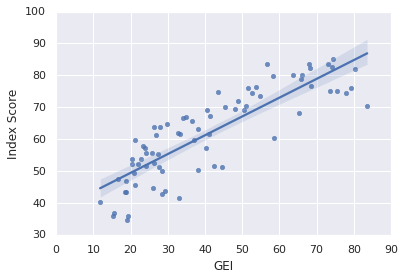

In [ ]:
sns.regplot(x='GEI',y='Index Score',data=better_df)

In [ ]:
from scipy.stats import linregress

In [ ]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=better_df['GEI'], y=better_df['Index Score'])

In [ ]:
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  0.59  * x +  37.65
R² =  0.72
